# Preparing the Data
1. Quality of data is important to train the model
2. Source – Government databases, professional or company data sources(twitter), your company, etc
3. Data will never be in the format you need – Pandas Dataframe for reformatting
4. Columns to remove – No values, duplicate(correlated column, e.g: house size in ft and metres)
5. Preprocessing refers to transformation before feeding to machine learning
6. Learning algorithms understands only number, converting text image to number is required
7. Unscaled or unstandardized data have might have unacceptable prediction


## Types of Data Preprocessing
1. Checking for Null Values
2. Correlated Feature Check
3. Data Molding (Encoding)
4. Splitting the Data
5. Impute Missing Values
6. Data Standardization (Feature Scaling)
7. Label Encoding
8. One-Hot Encoding

In [23]:
import pandas as pd                 # pandas is a dataframe library
import matplotlib.pyplot as plt      # matplotlib.pyplot plots data

%matplotlib inline
#Loading and Reviewing the Data
df = pd.read_csv("C:\\Users\\HP\\Desktop\\time series data\\indexanita_DataFrame.csv")
#print(df.shape)
df.head(10)

,Precentral_gyrus_L_1,Precentral_gyrus_R_1,Precentral_gyrus_1
0,-0.046045,-0.048815,-0.008641
1,0.005564,0.010136,-0.005523
2,0.055217,0.061791,0.003147
3,0.050261,0.045803,0.014724
4,-0.007147,-0.024628,0.017772
5,-0.061167,-0.072601,0.000651
6,-0.057450,-0.037271,-0.033859
7,0.002722,0.058145,-0.064144
8,0.062950,0.122115,-0.064207
9,0.065837,0.081982,-0.026540


Check for null values

In [24]:
df.isnull().values.any()

False

# Correlated Feature Check
Helper function that displays correlation by color

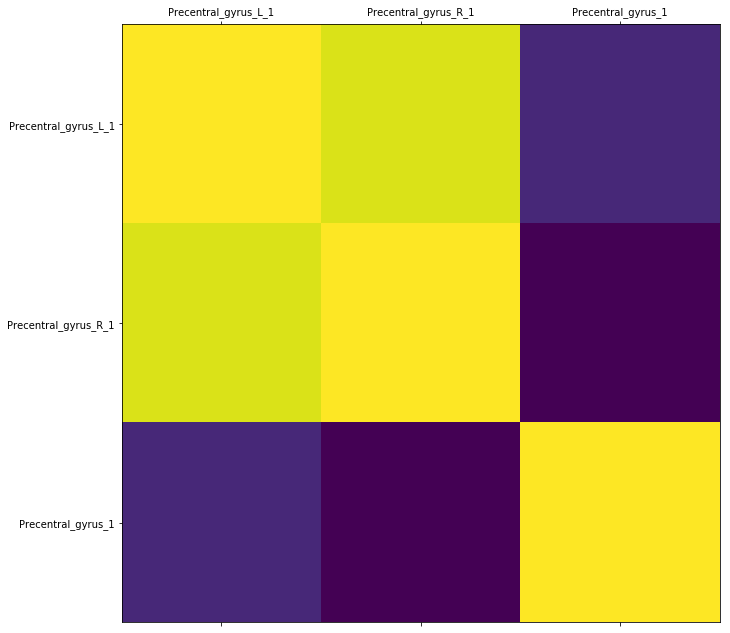

In [25]:
def plot_corr(df, size=11):
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot

    Displays:
        matrix of correlation between columns.
    """

    corr = df.corr()    # data frame correlation function
    fig, ax = plt.subplots(figsize=(size, size))#The subplots command in the background will call plt.figure(), and any keywords will be passed along
    ax.matshow(corr)   # heatmap with matshow, color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns)  # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)  # draw y tick marks
    
plot_corr(df)


In [26]:
df.corr()

,Precentral_gyrus_L_1,Precentral_gyrus_R_1,Precentral_gyrus_1
Precentral_gyrus_L_1,1.000000,0.938185,0.020681
Precentral_gyrus_R_1,0.938185,1.000000,-0.106880
Precentral_gyrus_1,0.020681,-0.106880,1.000000


In [27]:
df.head()

,Precentral_gyrus_L_1,Precentral_gyrus_R_1,Precentral_gyrus_1
0,-0.046045,-0.048815,-0.008641
1,0.005564,0.010136,-0.005523
2,0.055217,0.061791,0.003147
3,0.050261,0.045803,0.014724
4,-0.007147,-0.024628,0.017772


The skin and thickness columns are correlated 1 to 1. Dropping the skin column

Check for additional correlations

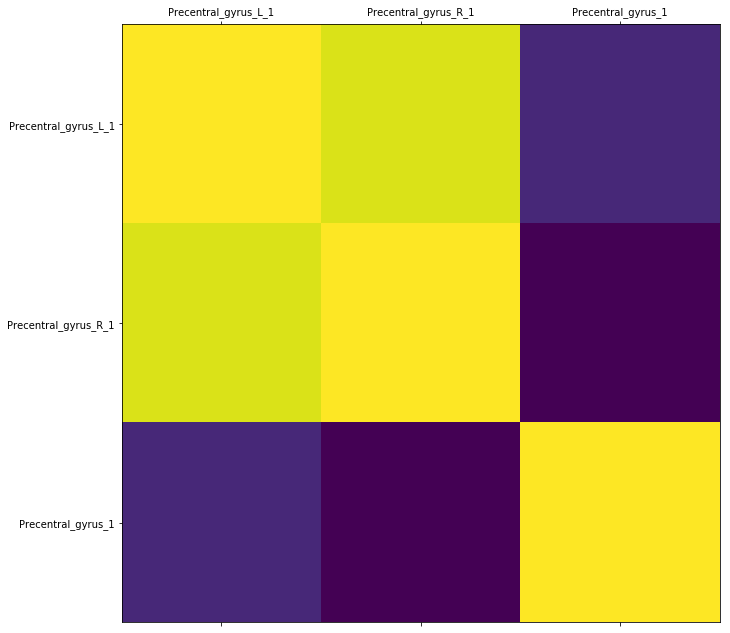

In [28]:
plot_corr(df)

# Data Molding(Encoding)
1. Adjusting Data Types - Inspect data types to see if there are any issues. Data should be numeric.
2. If required create new columns


# Splitting the Data
* Less training data -> your parameter estimates have greater variance
* Less testing data -> your performance statistic will have greater variance

### Divide data such that neither variance is too high

* Less data -> chances of no satisfactory variance
* More data -> split doesn't really matter

X = feature, independent, predictor
Y = predicted, dependent


Spliting the data¶

70% for training, 30% for testing


In [39]:
from sklearn.model_selection import train_test_split

feature_col_names = ['Precentral_gyrus_L_1', 'Precentral_gyrus_R_1']
predicted_class_names = ['Precentral_gyrus_1']

X = df[feature_col_names].values     # predictor feature columns (8 X m)
y = df[predicted_class_names].values # predicted class (1=true, 0=false) column (1 X m)
split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42) 
                            # test_size = 0.3 is 30%, 42 is the answer to everything
#We check to ensure we have the the desired 70% train, 30% test split of the data
print("{0:0.2f}% in training set".format((float(len(X_train))/float(len(df.index)))*100))
print("{0:0.2f}% in test set".format((float(len(X_test))/float(len(df.index)))*100))

70.00% in training set
30.00% in test set


# Impute Missing Values

## Missing Data
1. Ignore
2. Drop rows
3. Replace values (Impute)

NameError: name 'knn' is not defined

# Data Standardization (Feature Scaling)

Data standardization is the process of rescaling one or more attributes so that they have a mean value of 0 and a standard deviation of 1. Standardization assumes that your data has a Gaussian (bell curve) distribution.  

Apply scaling on the test scores to express them in terms of z-score  
Z-score is the expression of a value in terms of the number of standard deviations from the mean  
The effect is to give a score which is relative to the the distribution of values for that column  

z = $\frac {(x – μ)}{\sigma}$

In [30]:
import pandas as pd
exam_data = pd.read_csv('C:\\Users\\HP\\Desktop\\time series data\\indexanita_DataFrame.csv', quotechar='"')
exam_data.head(5)

,Precentral_gyrus_L_1,Precentral_gyrus_R_1,Precentral_gyrus_1
0,-0.046045,-0.048815,-0.008641
1,0.005564,0.010136,-0.005523
2,0.055217,0.061791,0.003147
3,0.050261,0.045803,0.014724
4,-0.007147,-0.024628,0.017772


In [31]:
from sklearn import preprocessing

exam_data[['Precentral_gyrus_L_1']] = exam_data[['Precentral_gyrus_L_1']].astype(float)
exam_data[['Precentral_gyrus_R_1']] = exam_data[['Precentral_gyrus_R_1']].astype(float)
exam_data[['Precentral_gyrus_1']] = exam_data[['Precentral_gyrus_1']].astype(float)
exam_data.head(5)

,Precentral_gyrus_L_1,Precentral_gyrus_R_1,Precentral_gyrus_1
0,-0.046045,-0.048815,-0.008641
1,0.005564,0.010136,-0.005523
2,0.055217,0.061791,0.003147
3,0.050261,0.045803,0.014724
4,-0.007147,-0.024628,0.017772


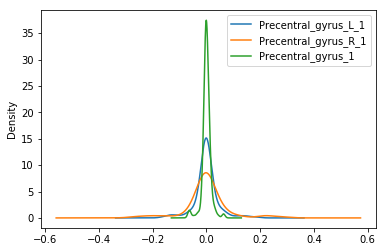

In [32]:
df_plot = exam_data[['Precentral_gyrus_L_1', 'Precentral_gyrus_R_1', 'Precentral_gyrus_1']].copy()
df_plot.plot.kde()

### Label Encoding:
Convert text values to numbers. These can be used in the following situations:
* There are only two values for a column in your data. The values will then become 0/1 - effectively a binary representation
* The values have relationship with each other where comparisons are meaningful (e.g. low<medium<high)

In [33]:
le = preprocessing.LabelEncoder()
exam_data['Precentral_gyrus_L_1'] = le.fit_transform(exam_data['Precentral_gyrus_L_1'].astype(str))
exam_data.head()

,Precentral_gyrus_L_1,Precentral_gyrus_R_1,Precentral_gyrus_1
0,75,-0.048815,-0.008641
1,116,0.010136,-0.005523
2,164,0.061791,0.003147
3,163,0.045803,0.014724
4,25,-0.024628,0.017772


In [34]:
print(le.classes_)


['-0.0005835077997816957' '-0.0006320716088912961'
 '-0.0009772796314053485' '-0.001409158042991078' '-0.001626406133051011'
 '-0.002351821581208929' '-0.002753920291342892' '-0.0028920162922543725'
 '-0.0029882478412745703' '-0.003172554992072237' '-0.0032060247307020423'
 '-0.003210815491444781' '-0.0037702588602257455' '-0.003855608283588093'
 '-0.0042992018869020465' '-0.004342739355112194' '-0.00443773668913183'
 '-0.005233338174239179' '-0.005676405455433947' '-0.006113824859385723'
 '-0.006223293353860907' '-0.006388786951426346' '-0.007018750700091882'
 '-0.00704275880642013' '-0.007051564710606704' '-0.007146574012690987'
 '-0.007209747633732269' '-0.007461161394050012' '-0.00747999678459322'
 '-0.0076127366286107235' '-0.007980474259341334' '-0.008194001620178195'
 '-0.008516026819376219' '-0.008820066566873539' '-0.008856963132250656'
 '-0.00894044583088768' '-0.009007662769483992' '-0.009658324633087393'
 '-0.009726722402971602' '-0.00982782936452764' '-0.010301279750575092

### One-Hot Encoding:
* Use when there is no meaningful comparison between values in the column
* Creates a new column for each unique value for the specified feature in the data set

In [35]:
exam_data = pd.get_dummies(exam_data, columns=['Precentral_gyrus_L_1','Precentral_gyrus_R_1', 'Precentral_gyrus_1'])
exam_data.head(5)

,Precentral_gyrus_L_1_0,Precentral_gyrus_L_1_1,Precentral_gyrus_L_1_2,Precentral_gyrus_L_1_3,Precentral_gyrus_L_1_4,Precentral_gyrus_L_1_5,Precentral_gyrus_L_1_6,Precentral_gyrus_L_1_7,Precentral_gyrus_L_1_8,Precentral_gyrus_L_1_9,...,Precentral_gyrus_1_0.0214179034001056,Precentral_gyrus_1_0.021925502475970943,Precentral_gyrus_1_0.02453004256641209,Precentral_gyrus_1_0.02800434250750561,Precentral_gyrus_1_0.02973566359630041,Precentral_gyrus_1_0.031653988136585695,Precentral_gyrus_1_0.03470517102221131,Precentral_gyrus_1_0.0439192204215989,Precentral_gyrus_1_0.06233293523732617,Precentral_gyrus_1_0.06467132509410968
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
df.keys()

Index(['Precentral_gyrus_L_1', 'Precentral_gyrus_R_1', 'Precentral_gyrus_1'], dtype='object')